# K-Means Clustering
![nn](images/kmeans.png)
- 장점
    - 알고리즘이 쉽고 간결하며, 대용량 데이터에도 활용이 가능함
- 단점
    - 거리 기반 알고리즘으로 차원이 높으면(피처의 개수가 많으면) 군집화 정확도가 떨어짐 (PCA로 차원축소를 할 필요가 있음)
    - 반복 수행 시 반복 횟수가 많으면 수행 시간이 느려짐
    - 이상치(outlier) 데이터에 취약

## K-Means로 Iris 데이터셋 clustering

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

iris = load_iris()
print('target names:', iris.target_names)
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(5)

target names: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### K-Means 객체 생성 후 군집화 수행
- labels_ 속성을 통해 각 데이터 포인트별로 어떤 군집 중심점(Centroid)에 할당되었는지 확인
- fit_predict(), fit_transform() 으로 수행 결과 확인

In [28]:
# 사이킷런 패키지는 K-means를 구현하기 위해 KMeans 클래스를 제공함
# 주요 파라미터
# n_clusters: 군집 중심점(centroid)의 개수
# init: 초기에 군집 중심점을 어떻게 설정할 것인지 그 방식을 설정하는 것. 임의로 하기 보다는 일반적으로 'k-means++' 방식으로 설정
# max_iter: 최대 반복 횟수이며, 그 횟수를 채우지 않더라도 모든 데이터의 중심점 이동이 없으면 종료될 수 있음
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/Users/jman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=0)

In [26]:
print(kmeans.labels_) # fit을 수행하고 labels_ 속성을 살펴보면 각 데이터 포인트가 어떤 군집 중심점에 속해있는지 레이블 값을 보여줌

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [38]:
# fit_predict를 실행한 결과는 fit을 하고 labels_ 속성을 보는 것과 동일하다
kmeans.fit_predict(irisDF)

/Users/jman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [39]:
# fit_transform을 수행하면 각 데이터로부터 군집 중심점(centroid)까지의 거리를 반환해준다
# 이 중 거리가 가장 짧은 군집 중심점에 속하게 될 것이다
kmeans.fit_transform(irisDF)

/Users/jman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[3.41925061, 0.14135063, 5.0595416 ],
       [3.39857426, 0.44763825, 5.11494335],
       [3.56935666, 0.4171091 , 5.27935534],
       [3.42240962, 0.52533799, 5.15358977],
       [3.46726403, 0.18862662, 5.10433388],
       [3.14673162, 0.67703767, 4.68148797],
       [3.51650264, 0.4151867 , 5.21147652],
       [3.33654987, 0.06618157, 5.00252706],
       [3.57233779, 0.80745278, 5.32798107],
       [3.3583767 , 0.37627118, 5.06790865],
       [3.32449131, 0.4824728 , 4.89806763],
       [3.31126872, 0.25373214, 4.9966845 ],
       [3.46661272, 0.50077939, 5.19103612],
       [3.90578362, 0.91322505, 5.65173594],
       [3.646649  , 1.01409073, 5.10804455],
       [3.49427881, 1.20481534, 4.88564095],
       [3.495248  , 0.6542018 , 5.03090587],
       [3.38444981, 0.1441527 , 5.02342022],
       [3.11245944, 0.82436642, 4.61792995],
       [3.37738931, 0.38933276, 4.97213426],
       [3.07471224, 0.46344363, 4.6955761 ],
       [3.31506588, 0.3286031 , 4.9236821 ],
       [3.

### 군집화 결과를 irisDF에 추가하고 실제 target 값과 비교

In [41]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
irisDF.head(3)

# 이때 cluster와 target은 서로 의미하는 바가 다르다
# target은 실제 타겟 값의 레이블, cluster는 군집화 수행 후 부여된 레이블 값이다

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [43]:
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


### 2차원 평면에 군집화 결과를 나타내기 위해 PCA로 차원축소

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[:, 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


In [ ]:
# 1번째 시각화 방법 (marker를 설정하려면 이렇게)

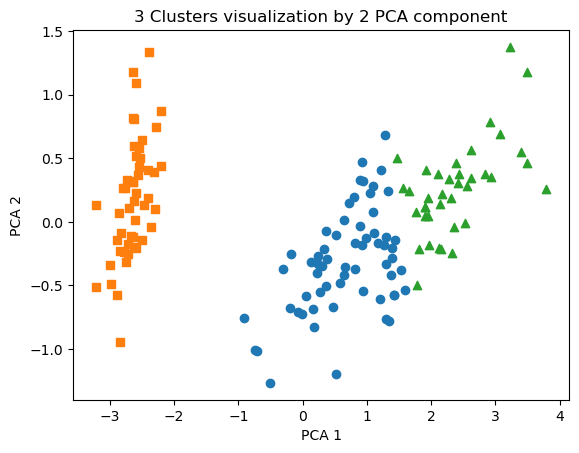

In [54]:
# 각 클러스터의 값에 매칭되는 데이터들의 index값 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# 각 클러스터 레이블값에 대해 다른 마커로 시각화
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters visualization by 2 PCA component')

plt.show()

In [48]:
# 2번째 시각화 방법 (편하게 빠르게 시각화하려면 이렇게)

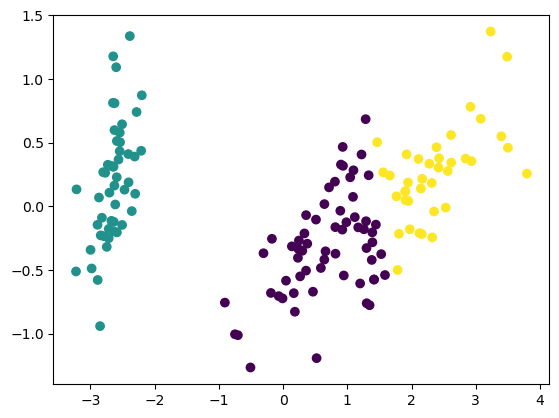

In [56]:
plt.scatter(x=irisDF.loc[:, 'pca_x'], y=irisDF.loc[:, 'pca_y'], c=irisDF['cluster'])
plt.show()

## Clustering 알고리즘 테스트를 위한 데이터 생성
- make_blobs

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target value 분포 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


n_samples: 생성할 총 데이터의 개수. 디폴트는 100개

<br />

n_features: 데이터의 피처 개수. 시각화를 목표로 할 경우 2개로 설정해 보통 첫 번째 피처는 x 좌표, 두 번째 피처 는 y 좌표상에 표현

<br />

centers: int 값, 예를 들어 3으로 설정하면 군집의 수를 3으로 설정한다는 뜻. 그렇지 않고 ndarray 형태로 표현할 경우 개별 군집 중심점의 좌표를 의미

<br />

cluster_std: 생성될 군집 데이터의 표준 편차를 의미. 만일 float 값 0.8과 같은 형태로 지정하면 군집 내에서 데이 터가 표준편차 0.8을 가진 값으로 생성.
[0.8, 1,2, 0.6]과 같은 형태로 지정하면 3개의 군집에서 첫 번째 군집 내 데이터의 표준편차는 0.8, 두 번째 군집 내 데이터의 표준 편차는 1.2, 세 번째 군집 내 데이터의 표준편차는 0.6으로 생성. (군집별로 서로 다른 표준 편차를 가진 데이터 세트를 만들 때 사용)

In [64]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(10)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
5,-0.908302,1.970778,2
6,2.472119,0.437033,1
7,1.656842,2.441289,1
8,1.077800,4.625379,0
9,-1.679427,2.602003,2


### make_blobs()로 만들어진 데이터 포인트 시각화

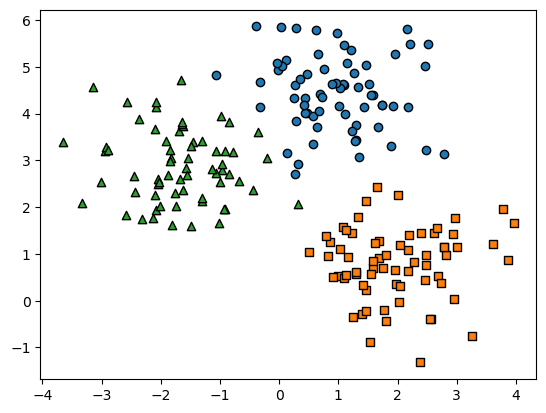

In [67]:
target_list = np.unique(y)
markers = ['o', 's', '^']

for target in target_list:
    target_cluster = clusterDF[clusterDF['target'] == target]
    plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

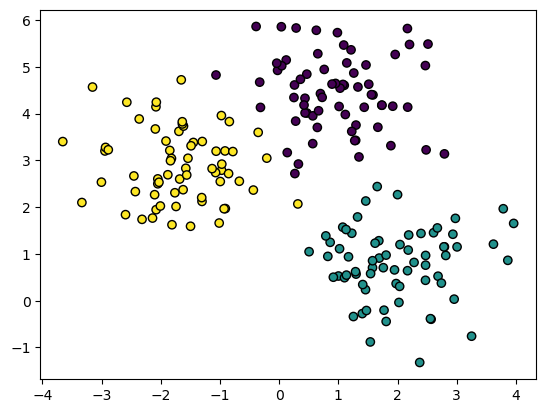

In [71]:
# 간단 시각화 버전
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolors='k', c=y)

In [72]:
clusterDF

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0
...,...,...,...
195,2.956576,0.033718,1
196,-2.074113,4.245523,2
197,2.783411,1.151438,1
198,1.226724,3.620511,0


In [ ]:
### K-means 클러스터링 수행 후 개별 클러스의 중심 위치를 시각화

/Users/jman/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


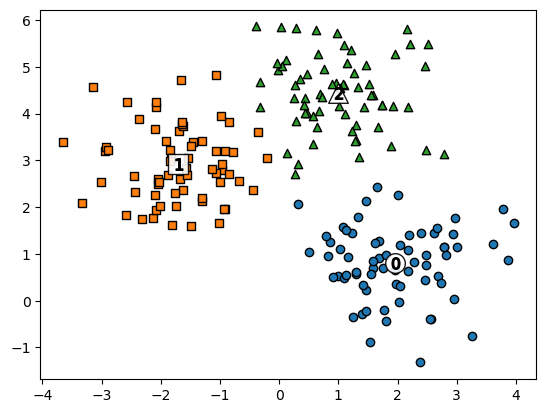

In [75]:
# KMeans 객체를 이용하여 X 데이터를 K-Means 클러스터링 수행 -> clusterDF에 추가
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

# cluster_centers_: 군집 중심점 좌표가 어디인지 알려줌
# cluster_centers_ 로 중심 위치 좌표 추출 (시각화를 위함)
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^']

# 클러스터링된 레이블별로 루프를 돌면서 scatter plot 그리기
for label in unique_labels:
    label_cluster = clusterDF[clusterDF['kmeans_label'] == label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    
    center_x_y = centers[label]
    
    # centroid 좌표를 활용해 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)


plt.show()

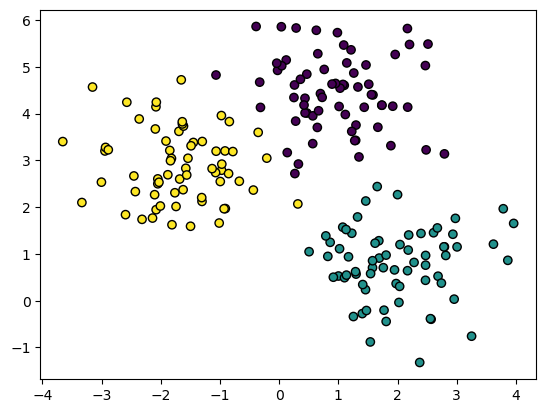

In [79]:
target_list = np.unique(y)
plt.scatter(x=clusterDF['ftr1'], y=clusterDF['ftr2'], edgecolor='k', c=y)

# make_blobs()로 만들어진 클러스터와 KMeans 클러스터링의 결과가 미세한 차이가 있다

In [81]:
# make_blobs 로 만들어진 타겟과 KMeans로 클러스터링된 레이블 값의 비교
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       2               66
        1                1
1       0               67
2       1               65
        0                1
Name: count, dtype: int64
